### Testing the imagage cropping algorithm from stackoverflow 

Testing the functions from stackoverflow on our image dataset.

source:
https://stackoverflow.com/questions/49049318/cropping-rectangular-photos-from-scans-in-opencv-with-python/49070934

In [1]:
import cv2
from os.path import basename
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
# Making plots bigger
plt.rcParams['figure.figsize'] = [10, 10]

In [18]:
def plotImageFromCorners(img_path, frame_cor):
    image = plt.imread(img_path, 0)
    
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig,ax = plt.subplots()
    
    ax.imshow(image)
    
    width = frame_cor[2] - frame_cor[0]
    height = frame_cor[3] - frame_cor[1]
     
    frame = patches.Rectangle((frame_cor[0],frame_cor[1]), width, height,linewidth=1,edgecolor='r',facecolor='none')
    
    ax.add_patch(frame)
    
    plt.title(img_path.split("/")[-1])
    
    fig.savefig('test_img/cropped_' + img_path.split("/")[-1], bbox_inches='tight', pad_inches=0)
        
    plt.show()

In [14]:
def get_contours(img):
    # First make the image 1-bit and get contours
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(imgray, 150, 255, 0)

    #cv2.imwrite('thresh.jpg', thresh)
    img2, contours, hierarchy = cv2.findContours(thresh, 1, 2)

    # filter contours that are too large or small
    size = get_size(img)
    contours = [cc for cc in contours if contourOK(cc, size)]
    return contours

def get_size(img):
    ih, iw = img.shape[:2]
    return iw * ih

def contourOK(cc, size=1000000):
    x, y, w, h = cv2.boundingRect(cc)
    if w < 50 or h < 50: return False # too narrow or wide is bad
    area = cv2.contourArea(cc)
    return area < (size * 0.5) and area > 200

def find_boundaries(img, contours):
    # margin is the minimum distance from the edges of the image, as a fraction
    ih, iw = img.shape[:2]
    minx = iw
    miny = ih
    maxx = 0
    maxy = 0

    for cc in contours:
        x, y, w, h = cv2.boundingRect(cc)
        if x < minx: minx = x
        if y < miny: miny = y
        if x + w > maxx: maxx = x + w
        if y + h > maxy: maxy = y + h

    return (minx, miny, maxx, maxy)

def crop(img, boundaries):
    minx, miny, maxx, maxy = boundaries
    return img[miny:maxy, minx:maxx]

def process_image(fname):
    img = cv2.imread(fname)
    contours = get_contours(img)
    #cv2.drawContours(img, contours, -1, (0,255,0)) # draws contours, good for debugging
    bounds = find_boundaries(img, contours)
    cropped = crop(img, bounds)
    if get_size(cropped) < 400: return # too small
    cv2.imwrite('test_img/cropped_' + img_path.split("/")[-1], cropped)

### Printing out all of the images with the frames

<Figure size 1440x1280 with 0 Axes>

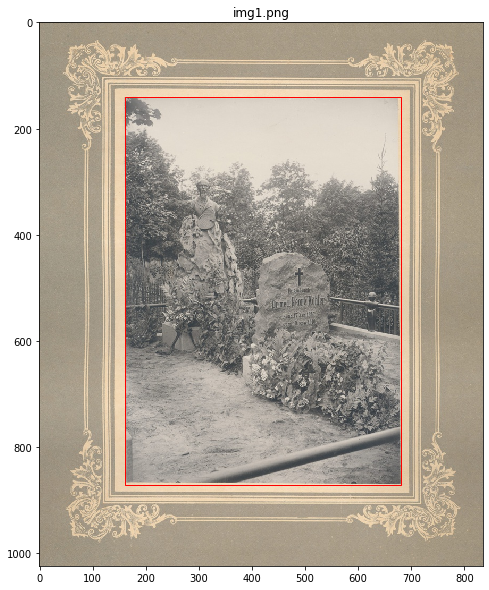

<Figure size 1440x1280 with 0 Axes>

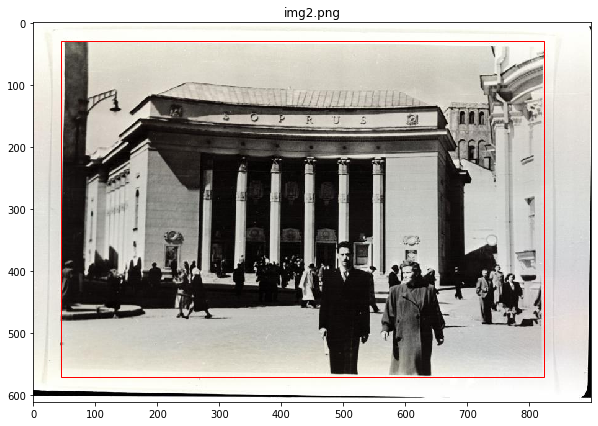

<Figure size 1440x1280 with 0 Axes>

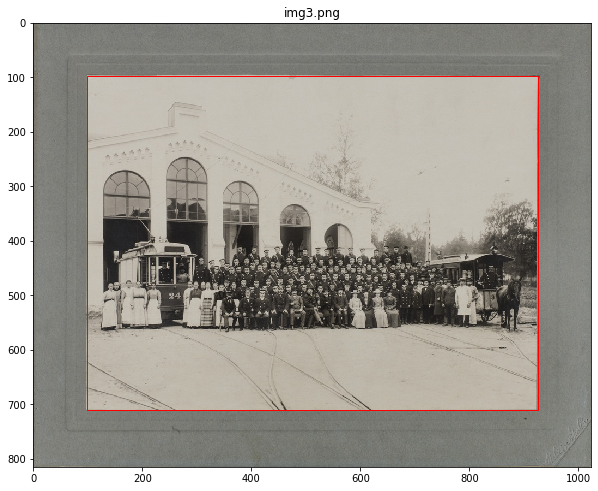

<Figure size 1440x1280 with 0 Axes>

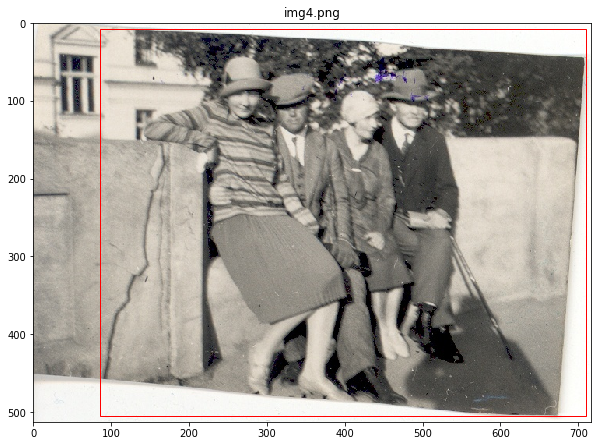

<Figure size 1440x1280 with 0 Axes>

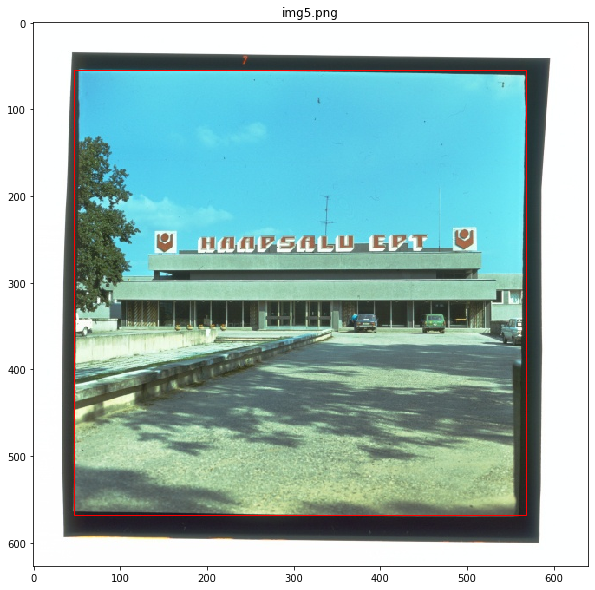

<Figure size 1440x1280 with 0 Axes>

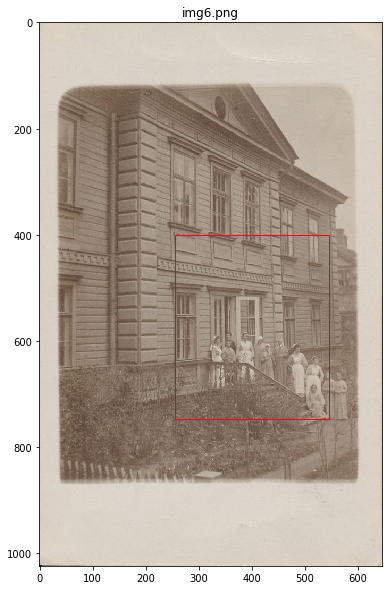

<Figure size 1440x1280 with 0 Axes>

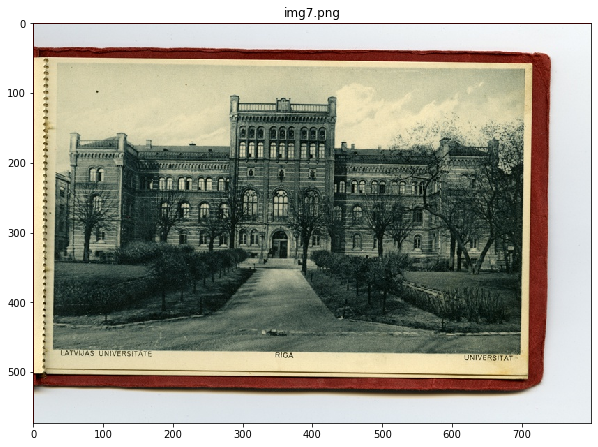

<Figure size 1440x1280 with 0 Axes>

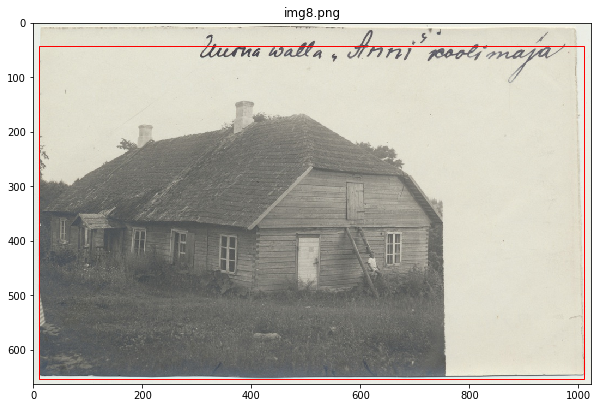

<Figure size 1440x1280 with 0 Axes>

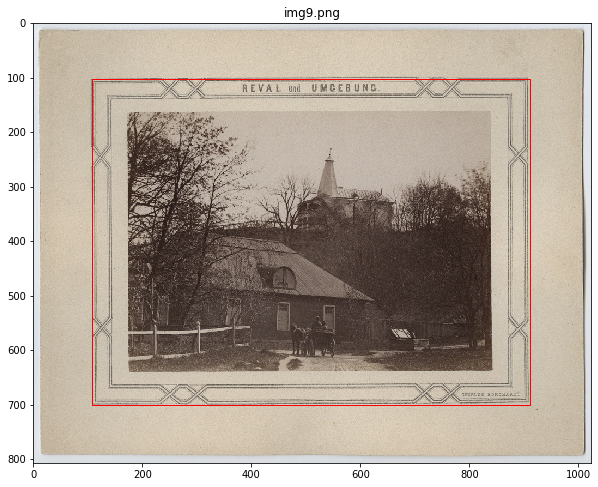

<Figure size 1440x1280 with 0 Axes>

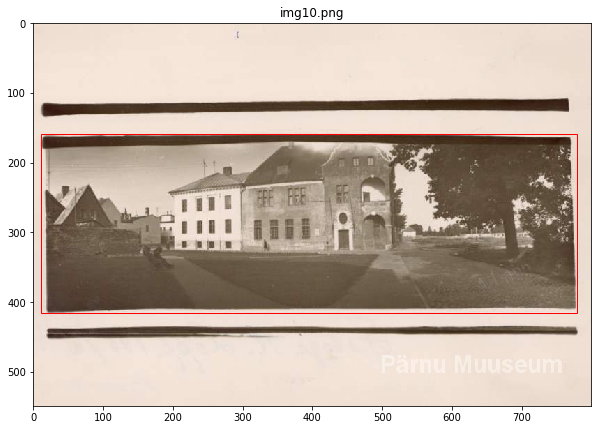

<Figure size 1440x1280 with 0 Axes>

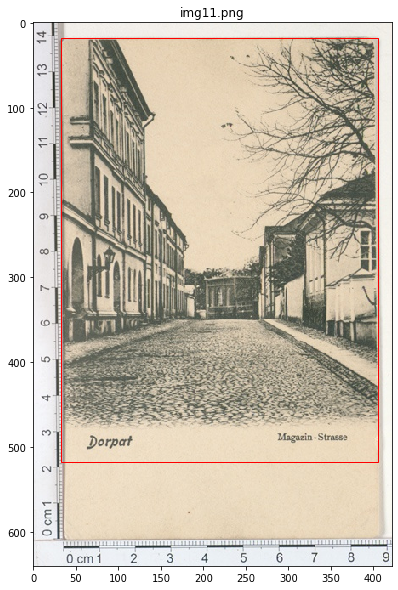

<Figure size 1440x1280 with 0 Axes>

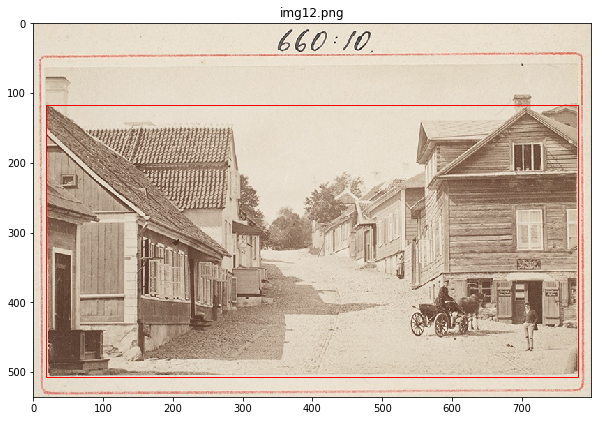

<Figure size 1440x1280 with 0 Axes>

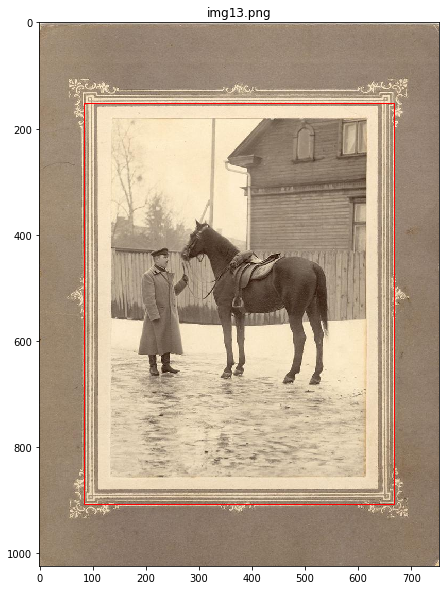

<Figure size 1440x1280 with 0 Axes>

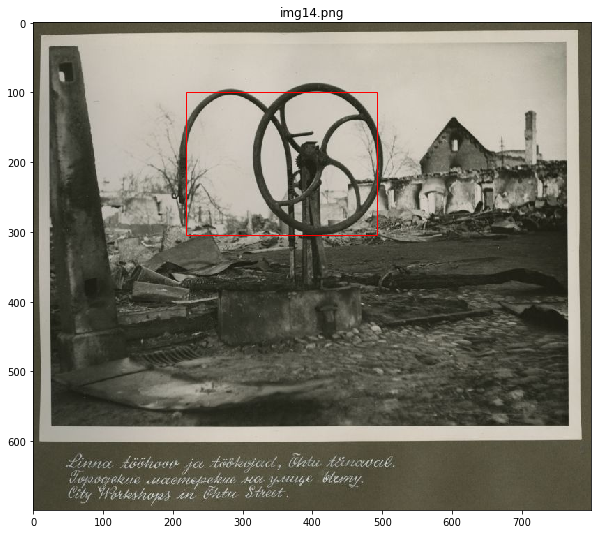

<Figure size 1440x1280 with 0 Axes>

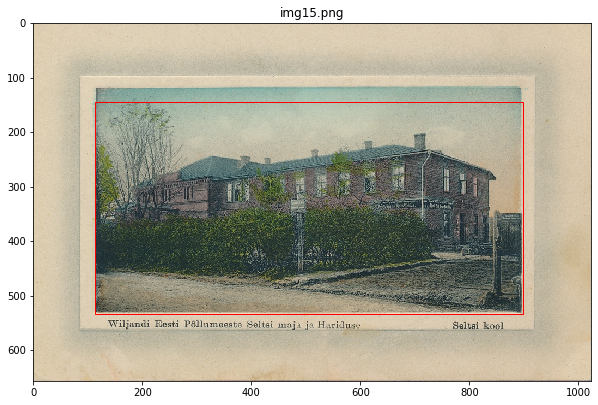

<Figure size 1440x1280 with 0 Axes>

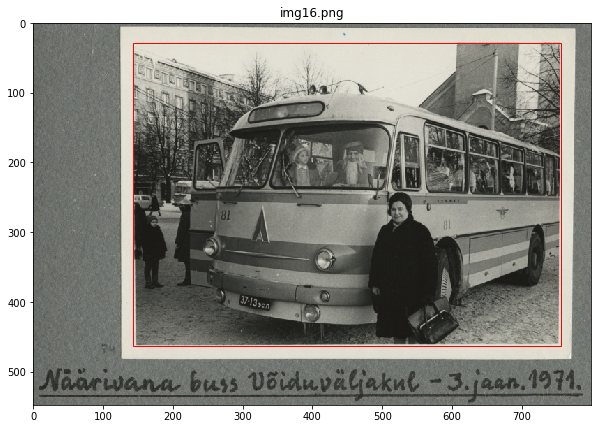

<Figure size 1440x1280 with 0 Axes>

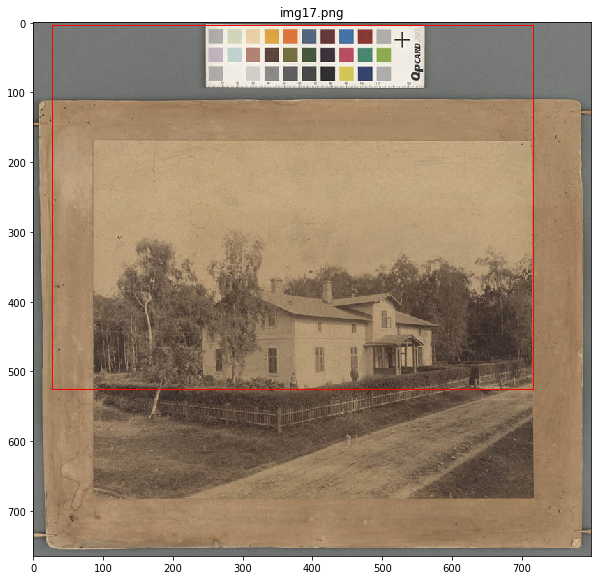

<Figure size 1440x1280 with 0 Axes>

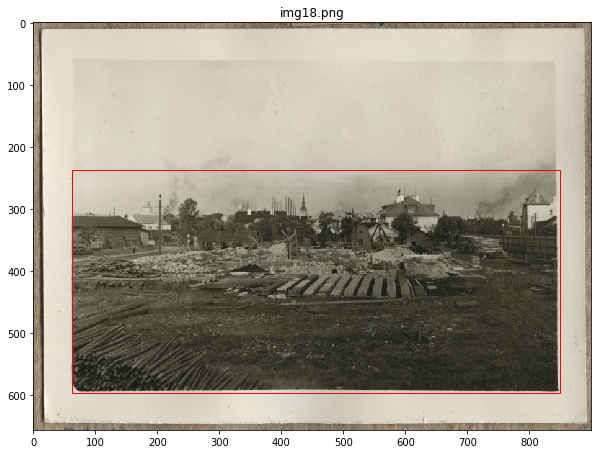

<Figure size 1440x1280 with 0 Axes>

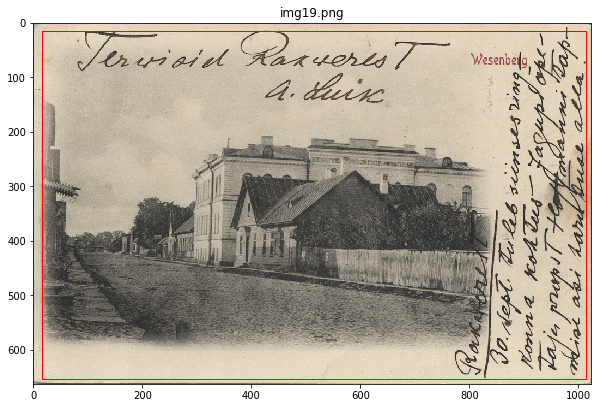

<Figure size 1440x1280 with 0 Axes>

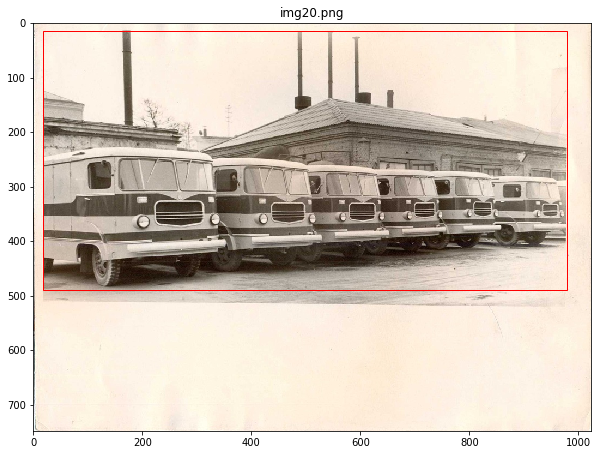

<Figure size 1440x1280 with 0 Axes>

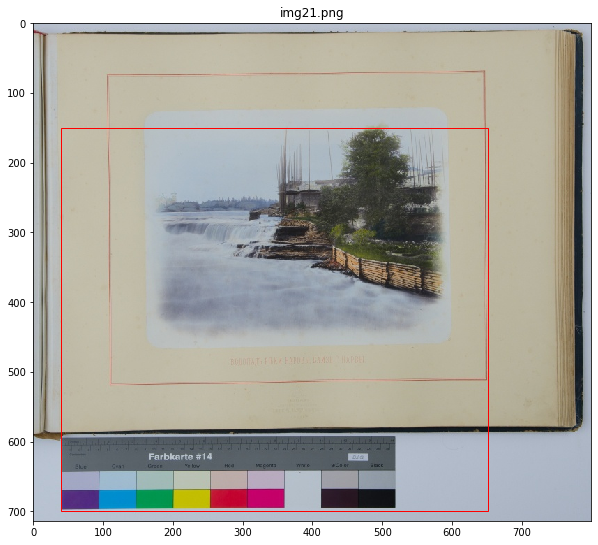

In [19]:
for i in range(1, 22):
    img_path = "img/img{}.png".format(i)
        
    img = cv2.imread(img_path)
    contours = get_contours(img)
    bounds = find_boundaries(img, contours)

    plotImageFromCorners(img_path, bounds)